In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "./data/open"
TRAIN_FILENAME = "train.csv"
TEST_FILENAME = "test.csv"
SUBMISSION_FILENAME = "sample_submission.csv"

TRAIN_PATH = os.path.join(DATA_PATH, TRAIN_FILENAME)
TEST_PATH = os.path.join(DATA_PATH, TEST_FILENAME)
SUBMISSION_PATH = os.path.join(DATA_PATH, SUBMISSION_FILENAME)

In [3]:
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df_submission = pd.read_csv(SUBMISSION_PATH)

df = pd.concat([df_train, df_test])
df = df.set_index("index")

number_of_train = df.credit.notnull().sum()

y_train = df["credit"][:df.credit.notnull().sum()].astype(int).astype(str)
del df["credit"]

In [4]:
df.head(2).T

index,0,1
gender,F,F
car,N,N
reality,N,Y
child_num,0,1
income_total,202500,247500
income_type,Commercial associate,Commercial associate
edu_type,Higher education,Secondary / secondary special
family_type,Married,Civil marriage
house_type,Municipal apartment,House / apartment
DAYS_BIRTH,-13899,-11380


In [5]:
df.corr()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
child_num,1.000000,0.033691,0.339357,-0.229379,NaN,0.048091,-0.016291,0.015960,0.889114,-0.003984
income_total,0.033691,1.000000,0.067908,-0.168611,NaN,-0.037746,0.017245,0.086681,0.023750,-0.017494
DAYS_BIRTH,0.339357,0.067908,1.000000,-0.616213,NaN,0.179054,-0.028659,0.105625,0.304020,0.053913
DAYS_EMPLOYED,-0.229379,-0.168611,-0.616213,1.000000,NaN,-0.242869,-0.007233,-0.085648,-0.221241,0.009285
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,0.048091,-0.037746,0.179054,-0.242869,NaN,1.000000,0.311644,-0.034838,0.064527,-0.009713
phone,-0.016291,0.017245,-0.028659,-0.007233,NaN,0.311644,1.000000,0.010455,-0.004221,-0.014893
email,0.015960,0.086681,0.105625,-0.085648,NaN,-0.034838,0.010455,1.000000,0.014619,0.002978
family_size,0.889114,0.023750,0.304020,-0.221241,NaN,0.064527,-0.004221,0.014619,1.000000,-0.020926
begin_month,-0.003984,-0.017494,0.053913,0.009285,NaN,-0.009713,-0.014893,0.002978,-0.020926,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         36457 non-null  object 
 1   car            36457 non-null  object 
 2   reality        36457 non-null  object 
 3   child_num      36457 non-null  int64  
 4   income_total   36457 non-null  float64
 5   income_type    36457 non-null  object 
 6   edu_type       36457 non-null  object 
 7   family_type    36457 non-null  object 
 8   house_type     36457 non-null  object 
 9   DAYS_BIRTH     36457 non-null  int64  
 10  DAYS_EMPLOYED  36457 non-null  int64  
 11  FLAG_MOBIL     36457 non-null  int64  
 12  work_phone     36457 non-null  int64  
 13  phone          36457 non-null  int64  
 14  email          36457 non-null  int64  
 15  occyp_type     25134 non-null  object 
 16  family_size    36457 non-null  float64
 17  begin_month    36457 non-null  float64
dtypes: flo

## 결측치 확인 후 불필요값 제거

In [7]:
df = pd.concat([df_train, df_test])
df = df.set_index("index")
df.isnull().sum()

del df["credit"]
df=df.drop('occyp_type', axis=1)
df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
index,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,2.0,-37.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,2.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,2.0,-19.0
36453,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,2.0,-34.0
36454,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,2.0,-55.0


In [8]:
df.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193
std,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000
75%,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


<AxesSubplot:>

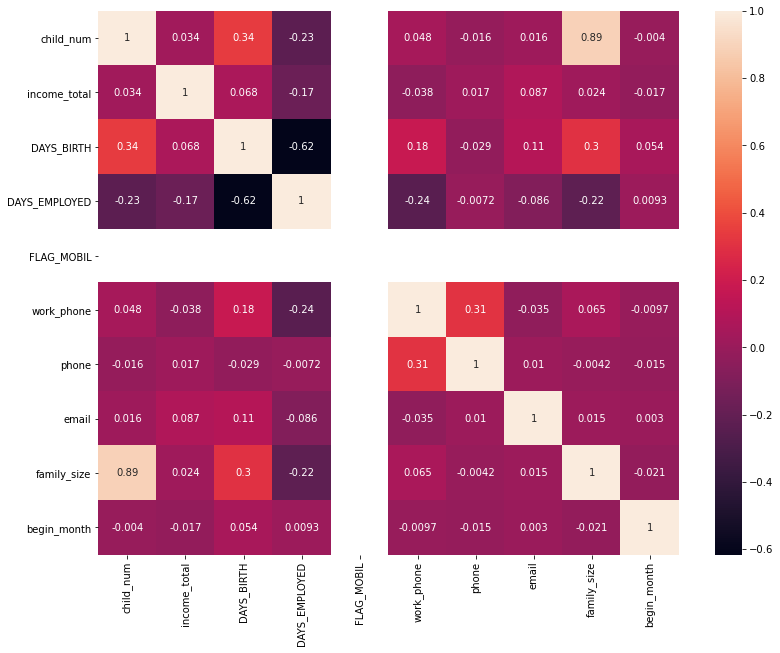

In [9]:
corr = df.corr()

plt.figure(figsize=(13,10))
sns.heatmap(corr, annot=True)

<AxesSubplot:ylabel='credit'>

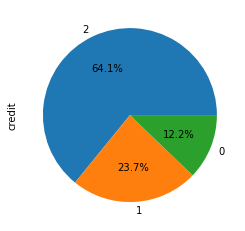

In [10]:
pd_y_train = pd.DataFrame(y_train)
pd_y_train

plt.figure(figsize = (12,4))
pd_y_train['credit'].value_counts().plot.pie(autopct='%1.1f%%')

In [11]:
# train 값 one_hot 처리
one_hot_train = pd.get_dummies(y_train)
one_hot_train

,0,1,2
index,,,
0,0,1,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
26452,0,1,0
26453,0,0,1
26454,0,0,1


# object type one_hot_merge

In [12]:
object_columns = [
    "gender", "car", "reality", "income_type", "edu_type", "family_type", "house_type"]
numeric_columns = [
 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
 'phone', 'email', 'family_size', 'begin_month']

In [13]:
# one_hot_merge 함수 생성 카테고리로 분류
def merge_and_get(ldf, rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf,rdf, how=how, on=on)

In [14]:
# 수동으로 작성
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["gender"], prefix="gender"), on=None, index=True) 
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["car"], prefix="car"), on=None, index=True) 
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["reality"], prefix="reality"), on=None, index=True) 
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["income_type"], prefix="income_type"), on=None, index=True) 
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["edu_type"], prefix="edu_type"), on=None, index=True) 
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["family_type"], prefix="family_type"), on=None, index=True) 
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["house_type"], prefix="house_type"), on=None, index=True)
one_hot_df.columns.tolist()

# train 값과 df 값의 one_hot 값을 merge 시켜준다.
merge_df = pd.merge(one_hot_train, one_hot_df,left_index=True,right_index=True)

# 원래 존재하던 칼럼 값을 제거하고 numeric 값들만 남긴다.해준다.
elimination_features= object_columns + numeric_columns
for col_name in elimination_features:
    merge_df.drop(col_name , axis=1, inplace=True)
merge_df

,0,1,2,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,...,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
index,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,1,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,1,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
26453,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
26454,0,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

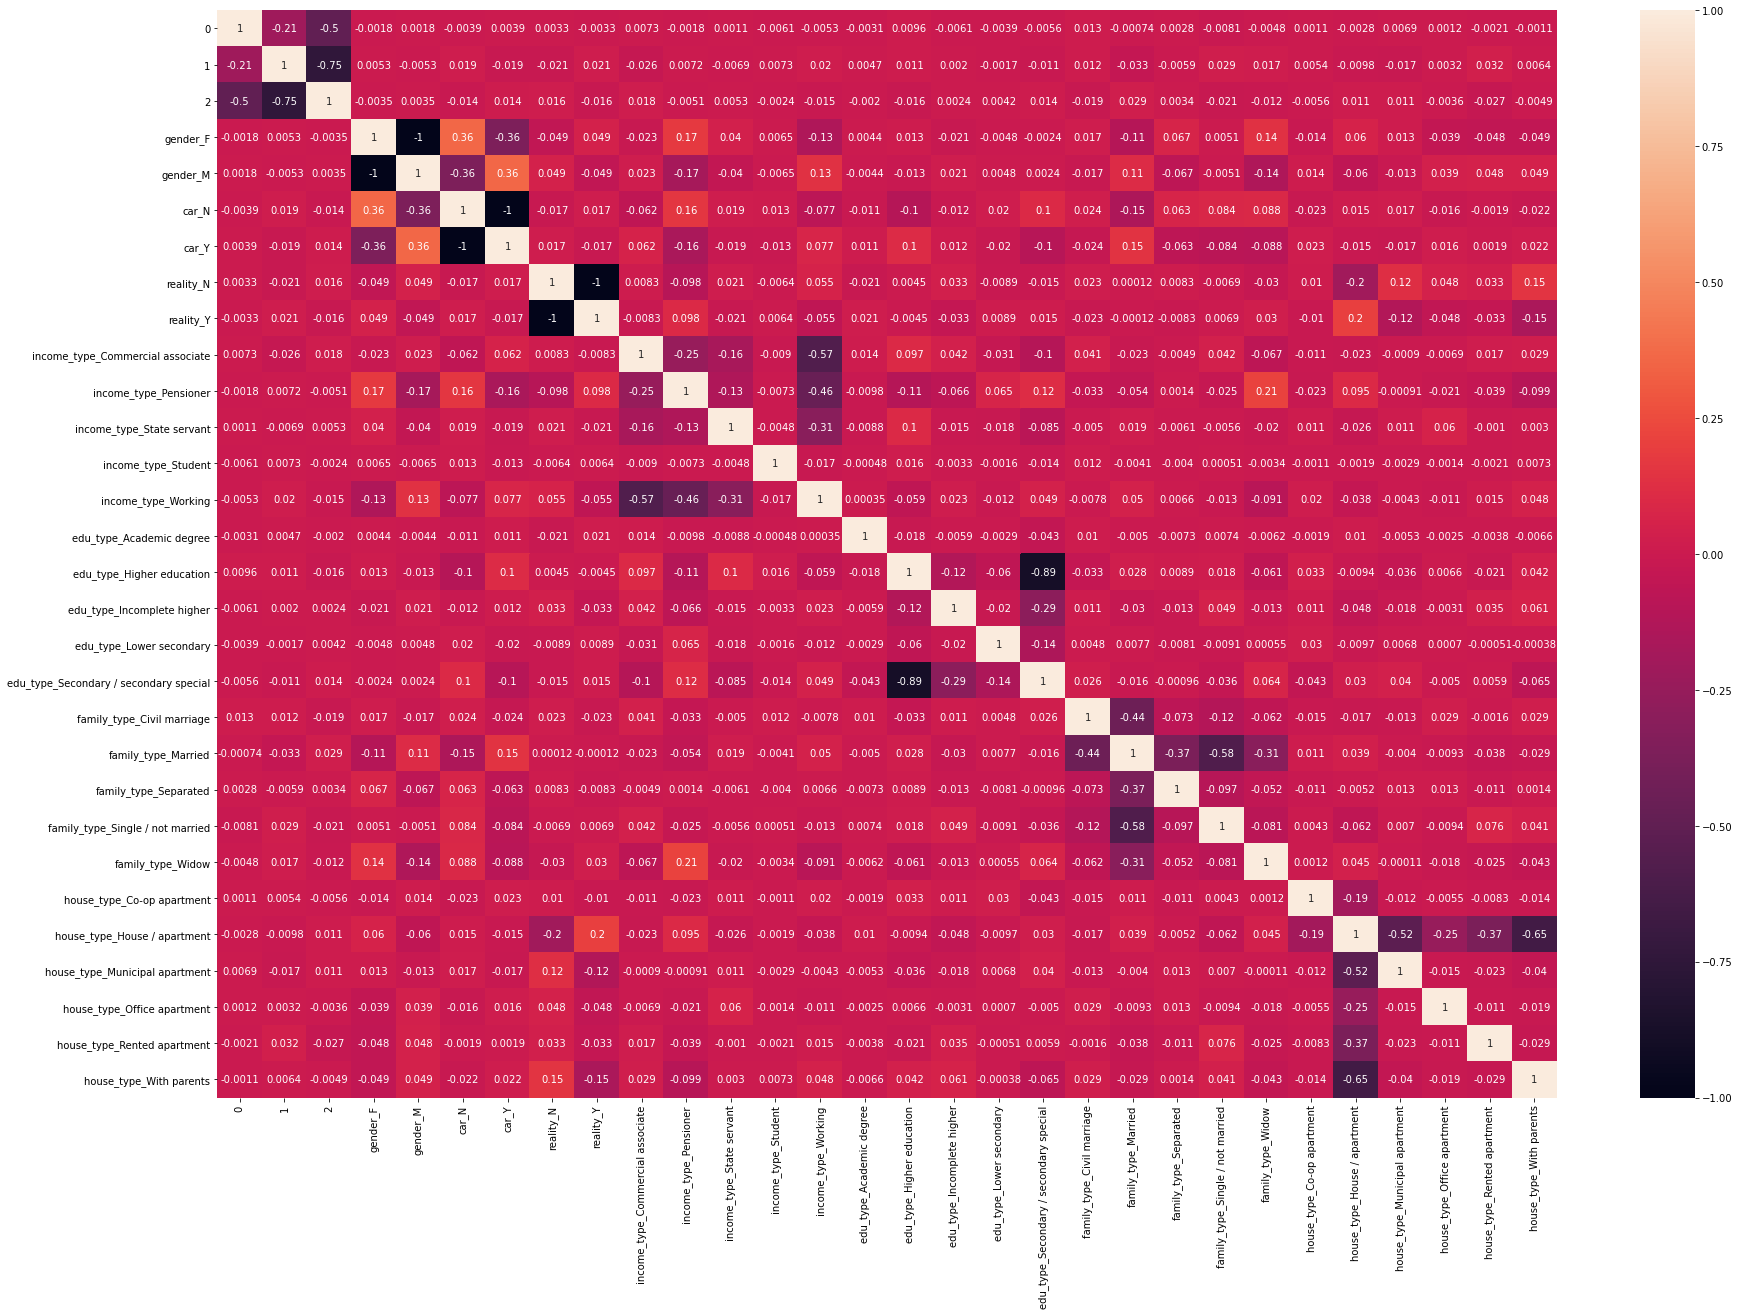

In [15]:
# 값들의 상관계수 확인
corr = merge_df.corr() # credit의 상관계수 높은게 별로 없어 0.02보다 높은 값만 찾아봤다.

plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)

# reality, income_type, family_type, house_type이 그나마 관계가 있음을 알 수 있다.

In [16]:
# 상관이 있다 생각한 object값들만 추출
corr_object_df = merge_df[["reality_N", "reality_Y", 'income_type_Commercial associate',
          'income_type_Pensioner', 'income_type_State servant', 'income_type_Student', 
          'income_type_Working', 
          'family_type_Civil marriage', 'family_type_Married', 'family_type_Separated',
          'family_type_Single / not married','family_type_Widow',
          'house_type_Co-op apartment', 'house_type_House / apartment', 'house_type_Municipal apartment',
          'house_type_Office apartment', 'house_type_Rented apartment', 'house_type_With parents'
         ]]
corr_object_df

,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
index,,,,,,,,,,,,,,,,,,
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
26453,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
26454,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


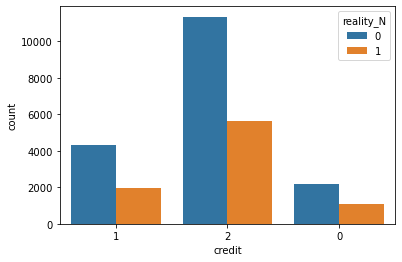

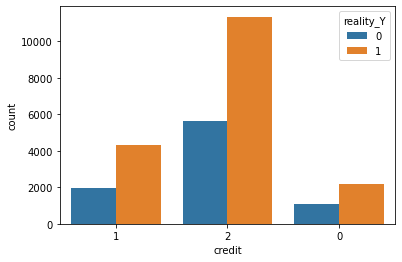

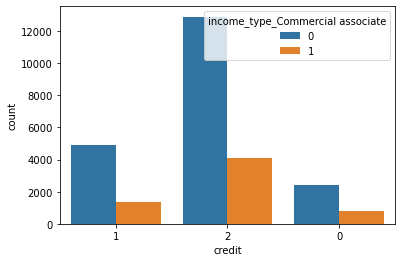

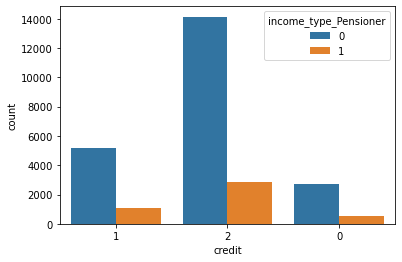

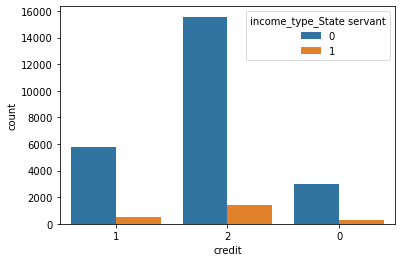

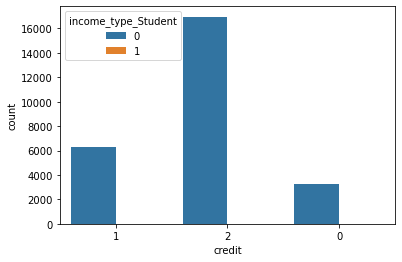

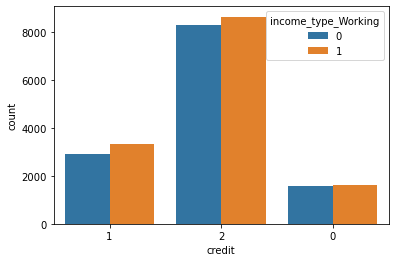

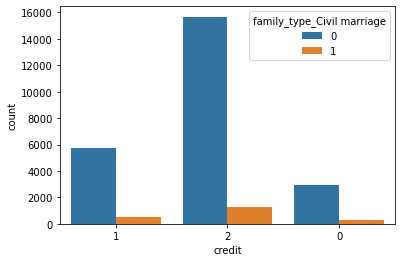

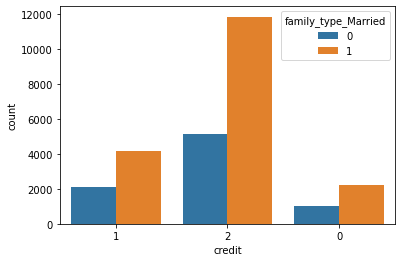

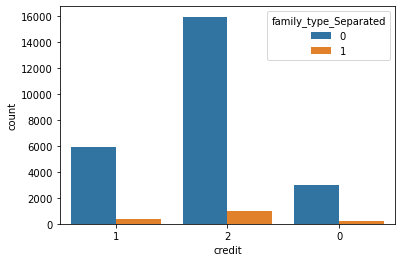

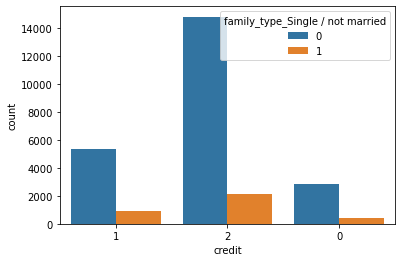

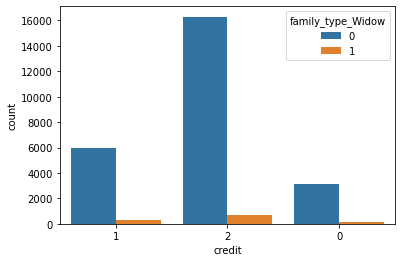

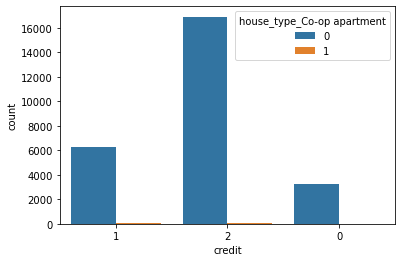

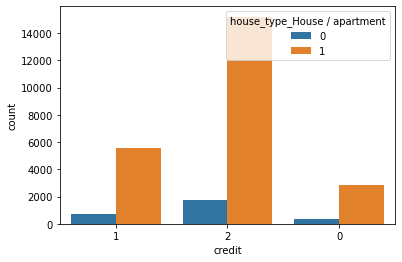

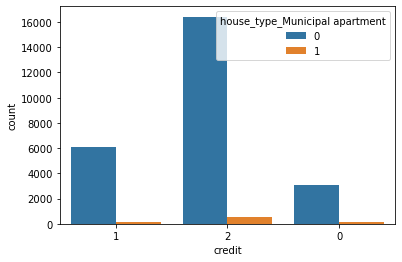

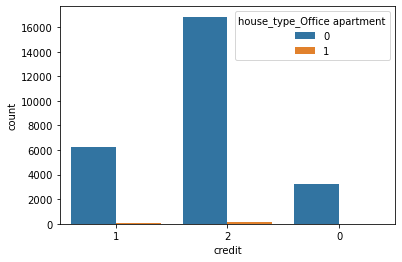

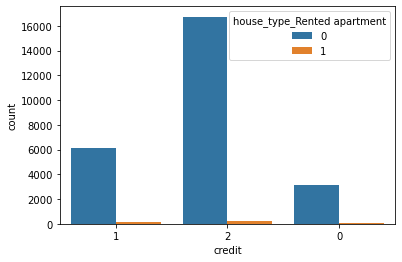

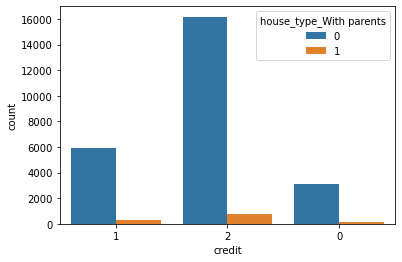

In [17]:
temp_columns = corr_object_df

for col_name in temp_columns:
    temp_df = pd.merge(corr_object_df[col_name], y_train, left_index=True, right_index=True)
    sns.countplot(x="credit", hue=col_name, data=temp_df)
    plt.show()

### 의미있는 상관관계는 없는 것 같다.

# Numeric type merge

<AxesSubplot:>

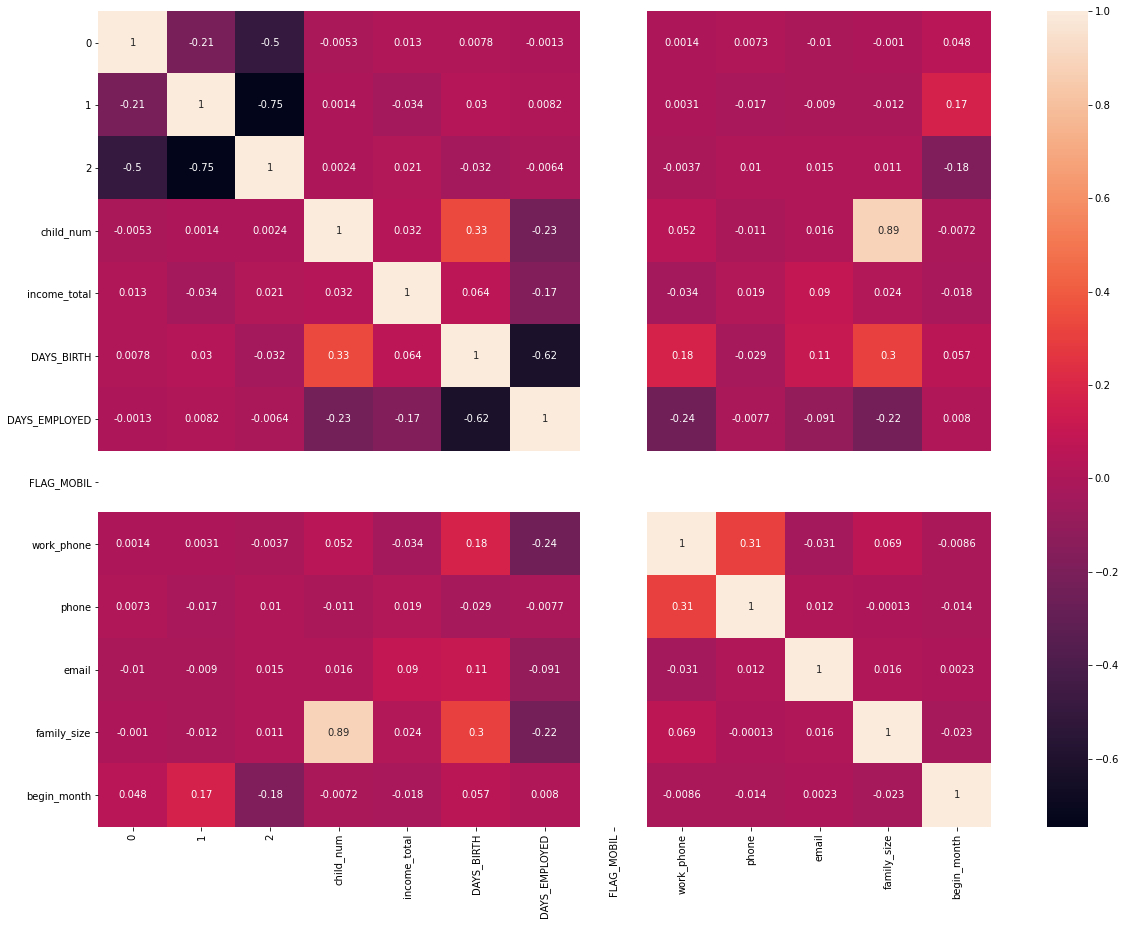

In [24]:
numeric_merge_df = pd.merge(one_hot_train, df[numeric_columns], left_index=True,right_index=True)
numeric_merge_df

corr = numeric_merge_df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr, annot=True)
#begin_month, income_total, DAYS_BIRTH 와 관계가 있는 것 같다.


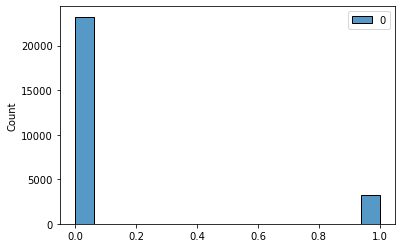

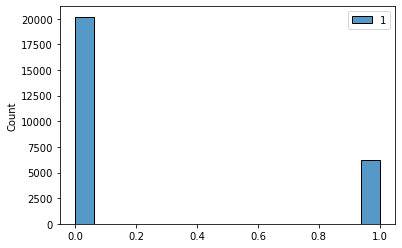

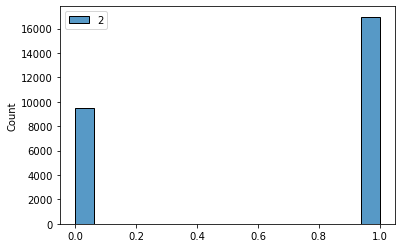

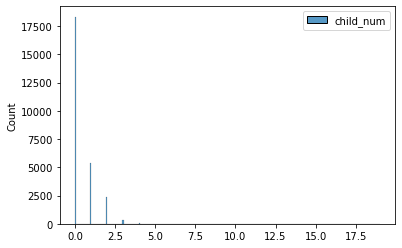

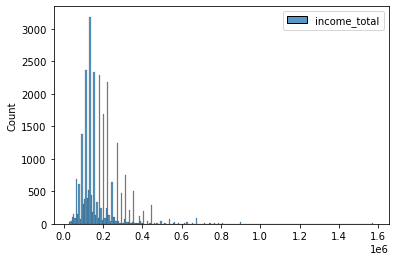

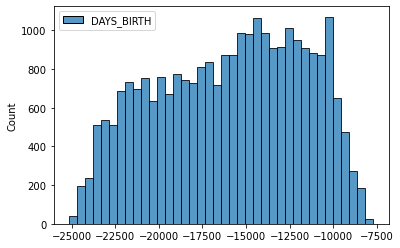

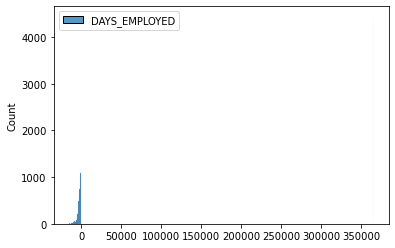

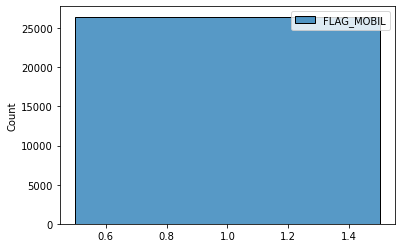

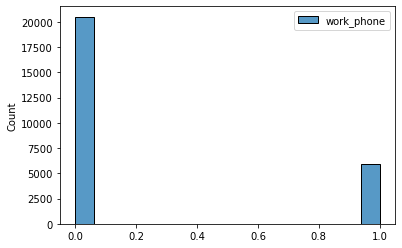

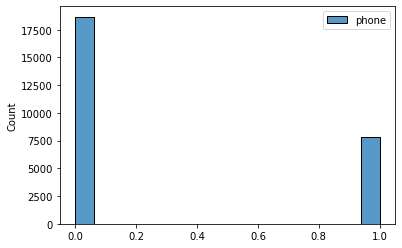

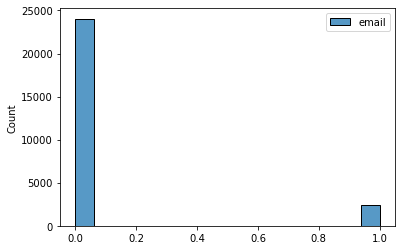

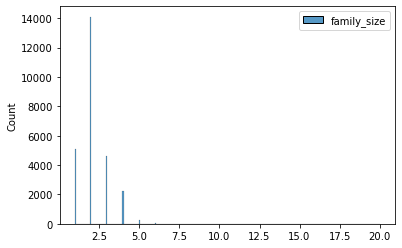

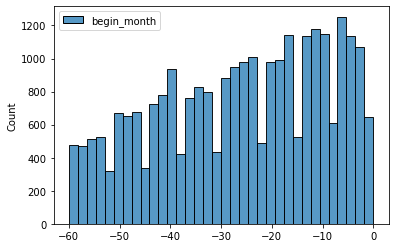

In [30]:
# numeric type의 데이터를 확인해본다.
temp_columns = numeric_merge_df

for col_name in temp_columns:
    temp_df = pd.merge(numeric_merge_df[col_name], y_train, left_index=True, right_index=True)
    sns.histplot(temp_df)
    plt.show()

### DAYS_EMPLOYED의 데이터가 이상한 것 같아 확인

# 음수값 normalize 처리

In [31]:
df[["DAYS_BIRTH","DAYS_EMPLOYED"]]

,DAYS_BIRTH,DAYS_EMPLOYED
index,,
0,-13899,-4709
1,-11380,-1540
2,-19087,-4434
3,-15088,-2092
4,-15037,-2105
...,...,...
36452,-18593,-5434
36453,-10886,-1315
36454,-21016,-14018


In [32]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [33]:
df["DAYS_EMPLOYED"] != 365243

index
0        True
1        True
2        True
3        True
4        True
         ... 
36452    True
36453    True
36454    True
36455    True
36456    True
Name: DAYS_EMPLOYED, Length: 36457, dtype: bool

In [34]:
df_normalize = df[["DAYS_BIRTH","DAYS_EMPLOYED"][:26457]]
df_normalize = df_normalize[df_normalize["DAYS_EMPLOYED"] != 365243]
df_normalize = normalize(df_normalize)
df_normalize

,DAYS_BIRTH,DAYS_EMPLOYED
index,,
0,0.625628,0.701070
1,0.772749,0.902969
2,0.322626,0.718591
3,0.556185,0.867801
4,0.559164,0.866972
...,...,...
36452,0.351478,0.654880
36453,0.801600,0.917304
36454,0.209964,0.107989


C:\Users\Seungjun\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

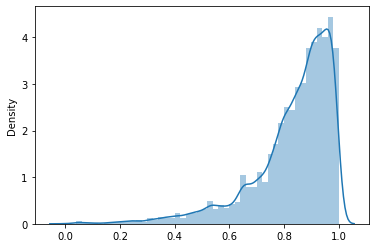

In [35]:
sns.distplot(df_normalize[["DAYS_EMPLOYED"]])

C:\Users\Seungjun\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

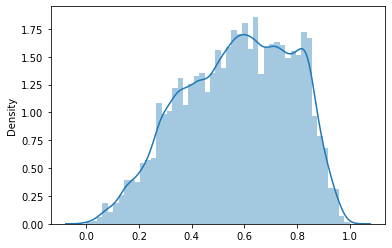

In [36]:
sns.distplot(df_normalize[["DAYS_BIRTH"]])

In [37]:
df_normalize[["DAYS_EMPLOYED"]]

,DAYS_EMPLOYED
index,
0,0.701070
1,0.902969
2,0.718591
3,0.867801
4,0.866972
...,...
36452,0.654880
36453,0.917304
36454,0.107989


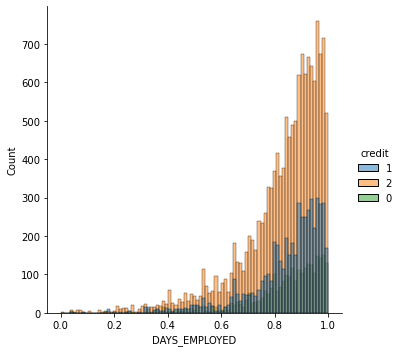

In [38]:
df_normal_result = pd.merge(pd_y_train, df_normalize[["DAYS_EMPLOYED"]], left_index=True, right_index=True)
df_normal_result
sns.displot(df_normal_result, x="DAYS_EMPLOYED", hue = "credit")

# test

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [40]:
# object 값의 학습한 값

df_selected_train = corr_object_df[:26457]
X_train = df_selected_train.values

result = cross_val_score(RandomForestClassifier(), X_train, y_train, scoring="accuracy", cv=10)
result.mean()

0.642741049370809

In [43]:
# numeric 값중 "begin_month","DAYS_BIRTH" 학습한 값

df_selected_train = numeric_merge_df[["begin_month","DAYS_BIRTH"]][:26457]
X_train = df_selected_train.values

result = cross_val_score(RandomForestClassifier(), X_train, y_train, scoring="accuracy", cv=10)
result.mean()

0.5846468829077526

In [48]:
# numeric 전체 값 중  학습한 값

df_selected_train = df[numeric_columns][:26457]
X_train = df_selected_train.values

result = cross_val_score(RandomForestClassifier(), X_train, y_train, scoring="accuracy", cv=10)
result.mean()

0.7012127447072086

In [50]:
# numeric, object 합친 전체 값 학습.

df_selected_train = pd.merge(df[numeric_columns][:26457], corr_object_df[:26457],left_index=True, right_index=True)
X_train = df_selected_train.values

result = cross_val_score(RandomForestClassifier(), X_train, y_train, scoring="accuracy", cv=10)
result.mean()

0.7014775235866243